Refer from https://autogis-site.readthedocs.io/en/latest/notebooks/L6/01_network_analysis.html Lesson6 'Network analysis in Python'

osmnx official document: https://osmnx.readthedocs.io/en/stable/index.html

In [61]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import CRS
import contextily as ctx

In [62]:
name = "Kamppi, Helsinki, Finland"


# Retrieve the network
graph = ox.graph_from_place(name, network_type='bike')

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


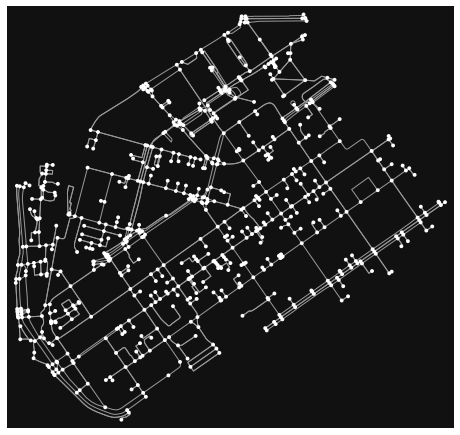

In [63]:
# plot the graph:
fig, ax = ox.plot_graph(graph)

In [64]:
# Get the area of interest polygon
place_polygon = ox.geocode_to_gdf(name)

# Re-project the polygon to a local projected CRS 
place_polygon = place_polygon.to_crs(epsg=3067)

# Buffer a bit
place_polygon["geometry"] = place_polygon.buffer(200)

# Re-project the polygon back to WGS84, as required by osmnx
place_polygon = place_polygon.to_crs(epsg=4326)

# Retrieve the network
graph = ox.graph_from_polygon(place_polygon["geometry"].values[0], network_type='bike')

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


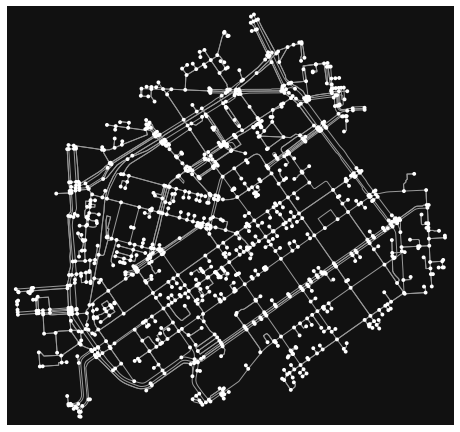

In [65]:
fig, ax = ox.plot_graph(graph)

In [66]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [67]:
edges.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'length',
       'geometry', 'junction', 'access', 'bridge', 'tunnel', 'service'],
      dtype='object')

In [68]:
edges.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
edges.head()


osmid  oneway lanes             name  \
u        v          key                                                       
25216594 1372425721 0               23717777    True     2    Porkkalankatu   
         1372425714 0               23856784    True     2   Mechelininkatu   
25238865 146447626  0    [59355210, 4229487]   False     2        Santakatu   
         57661989   0                7842621   False   NaN  Sinikaislankuja   
         314767800  0              231643806   False   NaN              NaN   

                             highway maxspeed  length  \
u        v          key                                 
25216594 1372425721 0        primary       40  10.404   
         1372425714 0        primary       40  40.885   
25238865 146447626  0    residential       30  44.303   
         57661989   0    residential       30  76.704   
         314767800  0       cycleway      NaN  60.066   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238865 146447626  0    LINESTRING (24.91994 60.16279, 24.91932 60.162...   
         57661989   0    LINESTRING (24.91994 60.16279, 24.91995 60.162...   
         314767800  0    LINESTRING (24.91994 60.16279, 24.92014 60.162...   

                        junction access bridge tunnel service  
u        v          key                                        
25216594 1372425721 0        NaN    NaN    NaN    NaN     NaN  
         1372425714 0        NaN    NaN    NaN    NaN     NaN  
25238865 146447626  0        NaN    NaN    NaN    NaN     NaN  
         57661989   0        NaN    NaN    NaN    NaN     NaN  
         314767800  0        NaN    NaN    NaN    NaN     NaN

In [70]:
edges['highway'].value_counts()


service                      896
cycleway                     473
residential                  470
tertiary                     217
primary                      167
pedestrian                   164
secondary                    121
unclassified                  42
living_street                 16
[residential, cycleway]        6
[pedestrian, cycleway]         4
[residential, pedestrian]      4
[service, living_street]       3
[living_street, service]       3
tertiary_link                  2
[service, pedestrian]          2
primary_link                   1
[service, unclassified]        1
Name: highway, dtype: int64

In [71]:
# Project the data
graph_proj = ox.project_graph(graph)

In [72]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [73]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [74]:
edges_proj.head()

osmid  oneway  \
u          v          key                                                    
25216594   1372425721 0                                   23717777    True   
           1372425714 0                                   23856784    True   
1372425721 25290781   0                                   29191566   False   
           60070671   0          [930820929, 930820930, 654270815]   False   
1372425714 25238874   0    [78537378, 8169098, 29081876, 78537375]    True   

                            lanes            name   highway maxspeed   length  \
u          v          key                                                       
25216594   1372425721 0         2   Porkkalankatu   primary       40   10.404   
           1372425714 0         2  Mechelininkatu   primary       40   40.885   
1372425721 25290781   0       NaN             NaN  cycleway      NaN  228.587   
           60070671   0       NaN             NaN  cycleway      NaN   41.006   
1372425714 25238874   0    [3, 2]  Mechelininkatu   primary       40   85.540   

                                                                    geometry  \
u          v          key                                                      
25216594   1372425721 0    LINESTRING (384631.322 6671580.071, 384620.884...   
           1372425714 0    LINESTRING (384631.322 6671580.071, 384624.750...   
1372425721 25290781   0    LINESTRING (384620.884 6671579.965, 384621.184...   
           60070671   0    LINESTRING (384620.884 6671579.965, 384620.720...   
1372425714 25238874   0    LINESTRING (384624.179 6671539.986, 384623.768...   

                          junction bridge tunnel access service  
u          v          key                                        
25216594   1372425721 0        NaN    NaN    NaN    NaN     NaN  
           1372425714 0        NaN    NaN    NaN    NaN     NaN  
1372425721 25290781   0        NaN    NaN    NaN    NaN     NaN  
           60070671   0        NaN    NaN    NaN    NaN     NaN  
1372425714 25238874   0        NaN    NaN    NaN    NaN     NaN

In [75]:
CRS(edges_proj.crs).to_epsg()

32635

In [76]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/stats.py:370: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 1212,
 'm': 2592,
 'k_avg': 4.2772277227722775,
 'edge_length_total': 91256.37299999996,
 'edge_length_avg': 35.20693402777776,
 'streets_per_node_avg': 2.6930693069306932,
 'streets_per_node_counts': {0: 0, 1: 327, 2: 17, 3: 587, 4: 263, 5: 18},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2698019801980198,
  2: 0.014026402640264026,
  3: 0.48432343234323433,
  4: 0.21699669966996699,
  5: 0.01485148514851485},
 'intersection_count': 885,
 'street_length_total': 57289.08999999986,
 'street_segment_count': 1591,
 'street_length_avg': 36.00822752985535,
 'circuity_avg': 1.0413053635744136,
 'self_loop_proportion': 0.0018856065367693275}

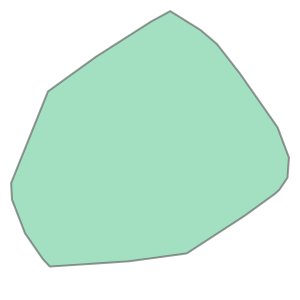

In [77]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Show output
convex_hull

Now we can use the Convex Hull above to calculate extended statistics for the network. As some of the metrics are produced separately for each node, they produce a lot of output. Here, we combine the basic and extended statistics into one pandas Series to keep things in more compact form.

In [78]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value
    
# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/stats.py:458: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


n                                                                                   1212
m                                                                                   2592
k_avg                                                                           4.277228
edge_length_total                                                              91256.373
edge_length_avg                                                                35.206934
streets_per_node_avg                                                            2.693069
streets_per_node_counts                     {0: 0, 1: 327, 2: 17, 3: 587, 4: 263, 5: 18}
streets_per_node_proportions           {0: 0.0, 1: 0.2698019801980198, 2: 0.014026402...
intersection_count                                                                   885
street_length_total                                                             57289.09
street_segment_count                                                                1591
street_length_avg    

As we can see, now we have a LOT of information about our street network that can be used to understand its structure. We can for example see that the average node density in our network is 149 nodes/km and that the total edge length of our network is almost 20 kilometers.

Furthermore, we can see that the degree centrality of our network is on average 0.0326515. Degree is a simple centrality measure that counts how many neighbors a node has (here a fraction of nodes it is connected to). Another interesting measure is the PageRank that measures the importance of specific node in the graph. Here we can see that the most important node in our graph seem to a node with osmid 25416262. PageRank was the algorithm that Google first developed (Larry Page & Sergei Brin) to order the search engine results and became famous for.

You can read the Wikipedia article about different centrality measures if you are interested what the other centrality measures mean.

## Shortest path analysis¶
Let’s now calculate the shortest path between two points using the shortest path function in Networkx.

### Origin and destination points

First we need to specify the source and target locations for our route. If you are familiar with the Kamppi area, you can specify a custom placename as a source location. Or, you can follow along and choose these points as the origin and destination in the analysis:

Maria 01 - and old hospital area and current startup hub.

ruttopuisto - a park. Official name of this park is “Vanha kirkkopuisto”, but nominatim is also able to geocode the nickname.

We could figure out the coordinates for these locations manually, and create shapely points based on the coordinates. However, it is more handy to fetch the location of our source destination directly from OSM:

In [79]:
# Set place name
placename = "Maria 01, Helsinki"

In [80]:
# Geocode the place name
geocoded_place = ox.geocode_to_gdf(placename)

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [81]:
# Check the result
geocoded_place

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((24.92122 60.16644, 24.92126 60.16625...",60.167525,60.16624,24.92317,24.921221,105520837,way,23856740,60.166884,24.921661,"Maria 01, 16, Lapinlahdenkatu, Etu-Töölö, Hels...",building,yes,0.58084


In [82]:
# Re-project into the same CRS as the road network
geocoded_place = geocoded_place.to_crs(CRS(edges_proj.crs))

In [83]:
# Get centroid as shapely point
origin = geocoded_place["geometry"].centroid.values[0]

In [84]:
print(origin)

POINT (384692.1787195492 6671817.486579246)


Great! Now we have defined the origin point for our network analysis. We can repeat the same steps to retrieve central point of ruttopuisto-park as the destination:

In [85]:
# Set place name
placename = "ruttopuisto"

# Geocode the place name
geocoded_place = ox.geocode_to_gdf(placename)

# Re-project into the same CRS as the road network
geocoded_place = geocoded_place.to_crs(CRS(edges_proj.crs))

# Get centroid of the polygon as shapely point
destination = geocoded_place["geometry"].centroid.values[0]

print(destination)

POINT (385673.4277923347 6671690.223032337)


/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Now we have shapely points representing the origin and destination locations for our network analysis. Next step is to find these points on the routable network before the final routing.

## Nearest node¶
Let’s now find the nearest graph nodes (and their node IDs) to these points using OSMnx get_nearest_node. As a starting point, we have the two Shapely Point objects we just defined as the origin and destination locations.

According to the documentation of this function, we need to parse Point coordinates as coordinate-tuples in this order: latitude, longitude(or y, x). As our data is now projected to UTM projection, we need to specify with method parameter that the function uses 'euclidean' distances to calculate the distance from the point to the closest node (with decimal derees, use 'haversine', which determines the great-circle distances). The method parameter is important if you want to know the actual distance between the Point and the closest node which you can retrieve by specifying parameter return_dist=True.

In [87]:
# Get origin x and y coordinates
orig_xy = (origin.y, origin.x)

# Get target x and y coordinates
target_xy = (destination.y, destination.x)

In [88]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node_id = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node_id

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


319719983

In [89]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node_id = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node_id

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


1377208998

Now we have the IDs for the closest nodes that were found from the graph to the origin and target points that we specified.

Let’s retrieve the node information from the nodes_proj GeoDataFrame by passing the ids to the loc indexer

In [90]:
# Retrieve the rows from the nodes GeoDataFrame based on the node id (node id is the index label)
orig_node = nodes_proj.loc[orig_node_id]
target_node = nodes_proj.loc[target_node_id]

Let’s also create a GeoDataFrame that contains these points

In [91]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([orig_node, target_node], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()


,y,x,street_count,lon,lat,highway,ref,geometry
319719983,6.671816e+06,384706.296089,3,24.922273,60.166932,NaN,NaN,POINT (384706.296 6671815.989)
1377208998,6.671730e+06,385612.532846,3,24.938641,60.166412,NaN,NaN,POINT (385612.533 6671729.630)


Okay, as a result we got now the closest node IDs of our origin and target locations. As you can see, the index in this GeoDataFrame corresponds to the IDs that we found with get_nearest_node() function.

## Routing
Now we are ready to do the routing and find the shortest path between the origin and target locations by using the shortest_path() function of networkx. With weight -parameter we can specify that 'length' attribute should be used as the cost impedance in the routing. If specifying the weight parameter, NetworkX will use by default Dijkstra’s algorithm to find the optimal route. We need to specify the graph that is used for routing, and the origin ID (source) and the target ID in between the shortest path will be calculated:

In [92]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node_id, target=target_node_id, weight='length')

# Show what we have
print(route)

[319719983, 1382316822, 1382316829, 1382316852, 5464887863, 1382320461, 5154747161, 1378064352, 1372461709, 1372441203, 3205236795, 3205236793, 8244768393, 60278325, 56115897, 60072524, 7699019923, 7699019916, 7699019908, 7699019903, 267117319, 1897461604, 724233143, 724233128, 267117317, 846597945, 846597947, 2037356632, 1547012339, 569742461, 1372441189, 4524927399, 298372061, 7702074840, 7702074833, 60170471, 8856704555, 3227176325, 7676757030, 8856704573, 7676756995, 8856704588, 1377211668, 60170470, 8874925445, 3228706311, 1377211669, 1377209035, 1377208998]


As a result we get a list of all the nodes that are along the shortest path.

We could extract the locations of those nodes from the nodes_proj GeoDataFrame and create a LineString presentation of the points, but luckily, OSMnx can do that for us and we can plot shortest path by using plot_graph_route() function:

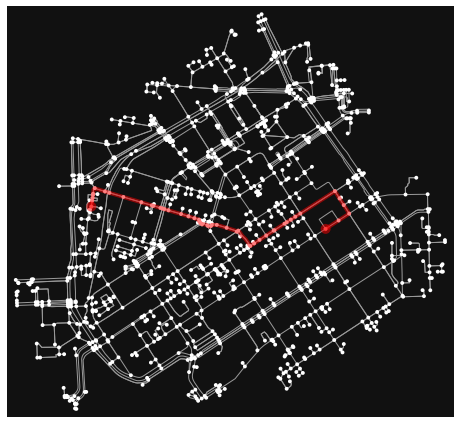

In [93]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route)

Nice! Now we have the shortest path between our origin and target locations. Being able to analyze shortest paths between locations can be valuable information for many applications. Here, we only analyzed the shortest paths based on distance but quite often it is more useful to find the optimal routes between locations based on the travelled time. Here, for example we could calculate the time that it takes to cross each road segment by dividing the length of the road segment with the speed limit and calculate the optimal routes by taking into account the speed limits as well that might alter the result especially on longer trips than here.

## Saving shortest paths to disk
Quite often you need to save the route into a file for further analysis and visualization purposes, or at least have it as a GeoDataFrame object in Python. Hence, let’s continue still a bit and see how we can turn the route into a linestring and save the shortest path geometry and related attributes into a geopackage file.

First we need to get the nodes that belong to the shortest path:

In [94]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]
route_nodes

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
319719983,6.671816e+06,384706.296089,3,24.922273,60.166932,NaN,NaN,POINT (384706.296 6671815.989)
1382316822,6.671839e+06,384709.579017,4,24.922319,60.167142,NaN,NaN,POINT (384709.579 6671839.311)
1382316829,6.671850e+06,384711.044607,3,24.922339,60.167236,NaN,NaN,POINT (384711.045 6671849.707)
1382316852,6.671861e+06,384712.504583,3,24.922359,60.167338,NaN,NaN,POINT (384712.505 6671860.984)
5464887863,6.671865e+06,384713.220293,3,24.922370,60.167377,NaN,NaN,POINT (384713.220 6671865.374)
1382320461,6.671887e+06,384719.671826,3,24.922473,60.167575,NaN,NaN,POINT (384719.672 6671887.215)
5154747161,6.671874e+06,384758.946564,3,24.923188,60.167471,NaN,NaN,POINT (384758.947 6671874.411)
1378064352,6.671869e+06,384776.322613,3,24.923504,60.167428,NaN,NaN,POINT (384776.323 6671869.117)
1372461709,6.671853e+06,384830.142058,3,24.924482,60.167300,NaN,NaN,POINT (384830.142 6671853.149)


As we can see, now we have all the nodes that were part of the shortest path as a GeoDataFrame.

Now we can create a LineString out of the Point geometries of the nodes:

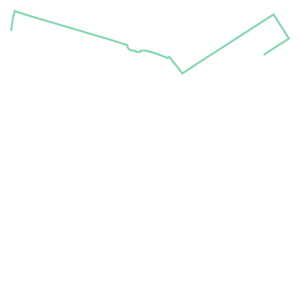

In [96]:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [97]:
# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

# Add a list of osmids associated with the route
route_geom.loc[0, 'osmids'] = str(list(route_nodes['osmid'].values))

# Calculate the route length
route_geom['length_m'] = route_geom.length

route_geom.head()

KeyError: 'osmid'

toDO:solve unexpected error KeyError: 'osmid'

Now we have a GeoDataFrame that we can save to disk. Let’s still confirm that everything is ok by plotting our route on top of our street network and some buildings, and plot also the origin and target points on top of our map.

Get buildings:

In [98]:
tags = {'building': True}
buildings = ox.geometries_from_place(name, tags)

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


re-project buildings

In [99]:
buildings_proj = buildings.to_crs(CRS(edges_proj.crs))

Let’s now plot the route and the street network elements to verify that everything is as it should:

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/mac/anaconda3/envs/ox/lib/python3.10/si

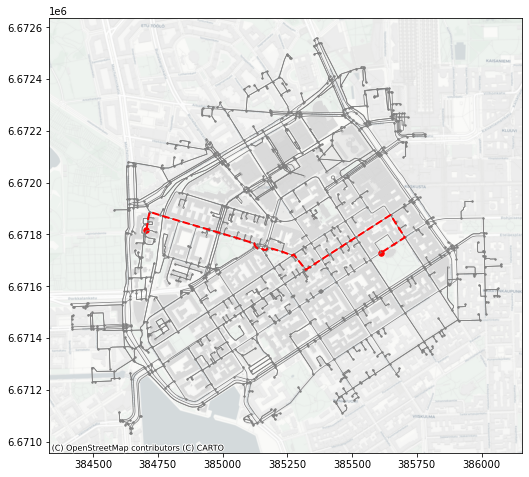

In [100]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot edges and nodes
edges_proj.plot(ax=ax, linewidth=0.75, color='gray')
nodes_proj.plot(ax=ax, markersize=2, color='gray')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='lightgray', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=30, color='red')

# Add basemap
ctx.add_basemap(ax, crs=buildings_proj.crs, source=ctx.providers.CartoDB.Positron)

Great everything seems to be in order! As you can see, now we have a full control of all the elements of our map and we can use all the aesthetic properties that matplotlib provides to modify how our map will look like. Now we are almost ready to save our data into disk.

## Prepare data for saving to file

The data contain certain data types (such as list or boolean) that should be converted into character strings prior to saving the data to file.Another option would be to drop invalid columns.

In [101]:
edges_proj.head()

osmid  oneway  \
u          v          key                                                    
25216594   1372425721 0                                   23717777    True   
           1372425714 0                                   23856784    True   
1372425721 25290781   0                                   29191566   False   
           60070671   0          [930820929, 930820930, 654270815]   False   
1372425714 25238874   0    [78537378, 8169098, 29081876, 78537375]    True   

                            lanes            name   highway maxspeed   length  \
u          v          key                                                       
25216594   1372425721 0         2   Porkkalankatu   primary       40   10.404   
           1372425714 0         2  Mechelininkatu   primary       40   40.885   
1372425721 25290781   0       NaN             NaN  cycleway      NaN  228.587   
           60070671   0       NaN             NaN  cycleway      NaN   41.006   
1372425714 25238874   0    [3, 2]  Mechelininkatu   primary       40   85.540   

                                                                    geometry  \
u          v          key                                                      
25216594   1372425721 0    LINESTRING (384631.322 6671580.071, 384620.884...   
           1372425714 0    LINESTRING (384631.322 6671580.071, 384624.750...   
1372425721 25290781   0    LINESTRING (384620.884 6671579.965, 384621.184...   
           60070671   0    LINESTRING (384620.884 6671579.965, 384620.720...   
1372425714 25238874   0    LINESTRING (384624.179 6671539.986, 384623.768...   

                          junction bridge tunnel access service  
u          v          key                                        
25216594   1372425721 0        NaN    NaN    NaN    NaN     NaN  
           1372425714 0        NaN    NaN    NaN    NaN     NaN  
1372425721 25290781   0        NaN    NaN    NaN    NaN     NaN  
           60070671   0        NaN    NaN    NaN    NaN     NaN  
1372425714 25238874   0        NaN    NaN    NaN    NaN     NaN

In [102]:
# Check if columns contain any list values
(edges_proj.applymap(type) == list).any()

osmid        True
oneway      False
lanes        True
name         True
highway      True
maxspeed     True
length      False
geometry    False
junction    False
bridge      False
tunnel      False
access      False
service      True
dtype: bool

In [103]:
# Columns with invalid values
invalid_cols = ['lanes', 'maxspeed', 'name', 'oneway', 'osmid', "highway", "service"]

#  convert selected columns to string format
edges_proj[invalid_cols] = edges_proj[invalid_cols].astype(str)

In [104]:
# Check again if columns contain any list values
(edges_proj.applymap(type) == list).any()

osmid       False
oneway      False
lanes       False
name        False
highway     False
maxspeed    False
length      False
geometry    False
junction    False
bridge      False
tunnel      False
access      False
service     False
dtype: bool

Now we can see that most of the attributes are of type object that quite often (such as ours here) refers to a string type of data.

## Save the data

In [106]:
import os

# Parse the place name for the output file names (replace spaces with underscores and remove commas)
place_name_out = name.replace(' ', '_').replace(',','')

# Output directory
out_dir = "data"

# Create output fp for a geopackage
out_fp = os.path.join(out_dir, f"OSM_{place_name_out}.gpkg")

# Save files
edges_proj.to_file(out_fp, layer="streets", driver="GPKG")
route_geom.to_file(out_fp, layer="route", driver="GPKG")
nodes_proj.to_file(out_fp, layer="nodes", driver="GPKG")
od_nodes.to_file(out_fp, layer="route_OD", driver="GPKG")
buildings[['geometry', 'name', 'addr:street']].to_file(out_fp, layer="buildings", driver="GPKG")

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/geopandas/io/file.py:389: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(gdal_version) >= LooseVersion("3.0.0") and crs:


DriverError: sqlite3_open(data/OSM_Kamppi_Helsinki_Finland.gpkg) failed: unable to open database file

toDo: add data set 'DriverError: sqlite3_open(data/OSM_Kamppi_Helsinki_Finland.gpkg) failed: unable to open database file'

Great, now we have saved all the data that was used to produce the maps into a geopackage.



# Advanced reading¶
